In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections, alignment_tools, domain_tools
print(os.getpid())

12656


# Initialize Cell_List class

In [4]:
reload(ia)
reload(ia.get_img_info)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.alignment_tools)
reload(ia.classes)
reload(ia.domain_tools)

<module 'ImageAnalysis3.domain_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\domain_tools.py'>

In [5]:
# initialize cell-list parameter dict
param = {'data_folder':r'X:\20190627_IMR90_CTP05_DNA',
         'save_folder':r'\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA',
         'experiment_type': 'DNA',
         'num_threads': 32,
         'correction_folder':r'I:\Corrections',
         'experiment_folder':r'X:\20190627_IMR90_CTP05_DNA\Experiment',
         };
# create cell_list object
lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])
# change some global settings
lst.shared_parameters['num_empty_frames'] = 0
lst.shared_parameters['corr_Z_shift'] = False

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 266
- Number of field of views: 70
- Importing csv file: X:\20190627_IMR90_CTP05_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: X:\20190627_IMR90_CTP05_DNA\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!
255 folders are found according to color-usage annotation.


# Segmentation for all (only for the very first time)

## generate cell_segmentations and manually correct

In [ ]:
%matplotlib notebook
lst._pick_cell_segmentations(_min_shape_ratio=0.035, _shrink_percent=12, 
                             _save=True, _overwrite=False)

In [ ]:
# run this to save updated nucleus status
new_labels, remove_cts, append_cts = lst._update_cell_segmentations(_return_all=True, 
                                                                    _overwrite_segmentation=False, 
                                                                    _append_radius=110)

In [ ]:
plt.close('all')

## another option: translate from old segmentation folder

In [ ]:
# generate rotation matrix
experiment_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment'
pos_file_before = os.path.join(experiment_folder, 'positions_10x_before.txt')    
pos_file_after = os.path.join(experiment_folder, 'positions_10x_after.txt')    
R,t = alignment_tools.align_manual_points(pos_file_before, pos_file_after)

In [ ]:
# required inputs
old_seg_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Analysis\segmentation'
old_dapi_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\H0R0'
old_correction_folder = r'I:\Corrections'
new_correction_folder = r'I:\Corrections'
# load previously generated rotation matrix 
experiment_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment'
rotation_mat = np.load(os.path.join(experiment_folder, 'rotation.npy'))
# translate segmentations!
new_seg_labels = lst._translate_old_segmentations(old_seg_folder, old_dapi_folder, rotation_mat,_force=True, 
                                                  _old_correction_folder=old_correction_folder,_return_all=True,
                                                  )

# Create cell objects

+ Create Cell_Data objects for field of view: [50 51 52 53 54 55]
++ preparing variables
++ choose dapi images from folder: X:\20190627_IMR90_CTP05_DNA\H0R0.
+ Load segmentation for fov 50
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_50_segmentation.npy


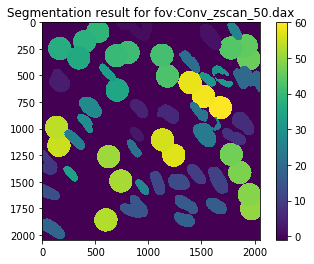

+ Create cell_data objects, num_of_cell:60
+ Load segmentation for fov 51
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_51_segmentation.npy


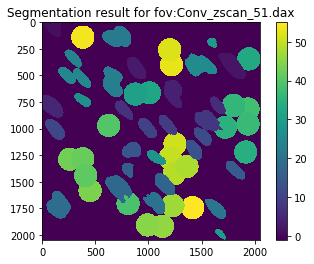

+ Create cell_data objects, num_of_cell:55
+ Load segmentation for fov 52
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_52_segmentation.npy


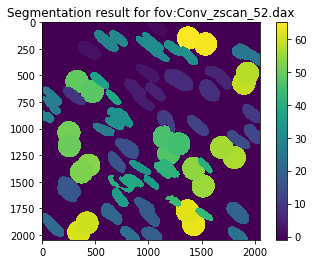

+ Create cell_data objects, num_of_cell:65
+ Load segmentation for fov 53
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_53_segmentation.npy


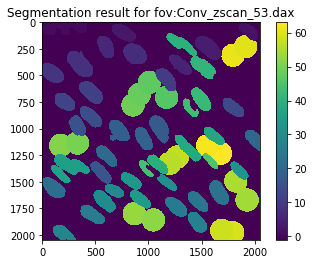

+ Create cell_data objects, num_of_cell:63
+ Load segmentation for fov 54
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_54_segmentation.npy


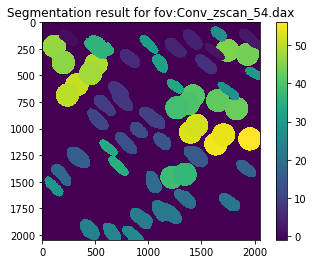

+ Create cell_data objects, num_of_cell:56
+ Load segmentation for fov 55
-- directly load segmentation result from:X:\20190627_IMR90_CTP05_DNA\Analysis\segmentation\Conv_zscan_55_segmentation.npy


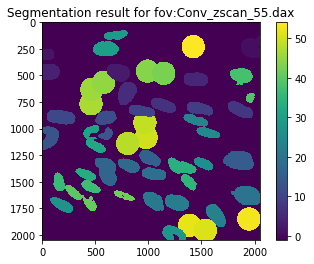

+ Create cell_data objects, num_of_cell:54
+ Creating 353 cells with 32 threads.


In [6]:
%matplotlib inline
#fov_ids = np.arange(1, 38)
#fov_ids = np.concatenate([np.arange(46, 48), np.arange(49,56)])
fov_ids = np.arange(50, 56)

lst._create_cells_fov(fov_ids, _drift_size=460, _coord_sel=[1000,1000], _load_segmentation=False,
                      _load_exist_info=False, _exclude_attrs=['segmentation_label'])

In [7]:
lst.cells = lst.cells[54:]

# Crop unique images

In [ ]:
# crop from original images
# note: now fov 1-10, 36-44 has been updated with new chromatic abbrevation in unique,
# all rna-unique are new
# all gene are new
lst._crop_image_for_cells('unique', _load_in_ram=False, 
                          _overwrite_cell_info=True, _force=True, _save=True)

+ Load images for 299 cells in this cell list
+ generating unique images for field-of-view:[50, 51, 52, 53, 54, 55]
+ Crop unique images for fov:50, cell:54
- Start cropping unique image
-- loading unique_rounds.npz, time:1.2749617099761963
- all channels in hyb:H0R0\Conv_zscan_50.dax don't have new unique regions, skip!
-- overwrite regions:369, 41 remains
-- overwrite regions:370, 40 remains
-- overwrite regions:368, 39 remains
-- overwrite regions:372, 38 remains
-- overwrite regions:373, 37 remains
-- overwrite regions:371, 36 remains
-- overwrite regions:376, 35 remains
-- overwrite regions:374, 34 remains
-- overwrite regions:375, 33 remains
-- overwrite regions:379, 32 remains
-- overwrite regions:377, 31 remains
-- overwrite regions:378, 30 remains
-- overwrite regions:382, 29 remains
-- overwrite regions:380, 28 remains
-- overwrite regions:381, 27 remains
-- overwrite regions:385, 26 remains
-- overwrite regions:383, 25 remains
-- overwrite regions:384, 24 remains
-- overwrit

- all channels in hyb:H254R138\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H255R255\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H256R256\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H257R257\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H258R258\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H259R259\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H260R260\Conv_zscan_50.dax don't have new unique regions, skip!
-- start cropping unique for fov:50, cell:55 with 32 threads
-- time spent in cropping:2046.7434554100037 for 651 images
-- saving unique to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-50\cell-55\unique_rounds.npz with 651 images
--- time spent in saving:318.5108036994934
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-50\cell-55\cell_info.pkl
-- loading 

- all channels in hyb:H254R138\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H255R255\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H256R256\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H257R257\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H258R258\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H259R259\Conv_zscan_50.dax don't have new unique regions, skip!
- all channels in hyb:H260R260\Conv_zscan_50.dax don't have new unique regions, skip!
-- start cropping unique for fov:50, cell:57 with 32 threads
-- time spent in cropping:2215.919885635376 for 651 images
-- saving unique to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-50\cell-57\unique_rounds.npz with 651 images
--- time spent in saving:334.5850341320038
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-50\cell-57\cell_info.pkl
-- loading e

Exception in thread Thread-26:
Traceback (most recent call last):
  File "E:\Users\puzheng\AppData\anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "E:\Users\puzheng\AppData\anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "E:\Users\puzheng\AppData\anaconda3\lib\multiprocessing\pool.py", line 463, in _handle_results
    task = get()
  File "E:\Users\puzheng\AppData\anaconda3\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "E:\Users\puzheng\AppData\anaconda3\lib\multiprocessing\connection.py", line 318, in _recv_bytes
    return self._get_more_data(ov, maxsize)
  File "E:\Users\puzheng\AppData\anaconda3\lib\multiprocessing\connection.py", line 337, in _get_more_data
    assert left > 0
AssertionError



In [ ]:
# crop from original images
lst._crop_image_for_cells('gene', _load_in_ram=False, 
                          _overwrite_cell_info=True, _force=False, _save=True)

# Generate chromosomes

## automatically generate chromosomes and manually pick

+ Generate chromosomes for cells.
++ dumping existing info to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\chrom_coords_36-44.pkl
Maximum dimension for these images: [ 30 397 447]


<IPython.core.display.Javascript object>


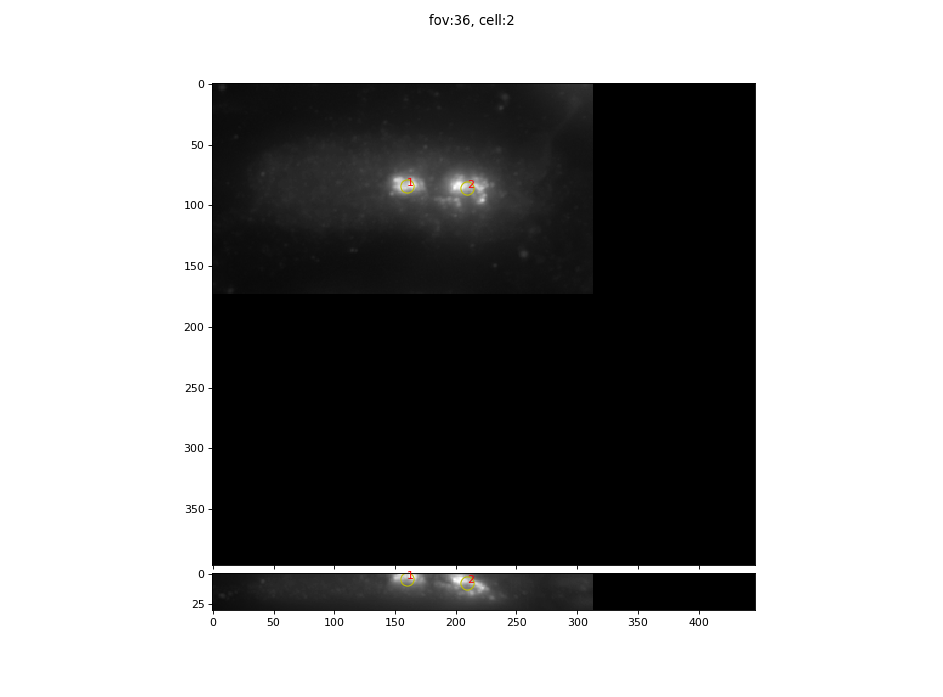

In [13]:
# pick
%matplotlib notebook
%matplotlib notebook
lst._get_chromosomes_for_cells('unique',_max_count=90, _overwrite=False)

## update manually picked chromosomes

In [14]:
# update
lst._update_chromosomes_for_cells()

+ Update manually picked chromosomes to cells
++ matching 2 chromosomes for fov:36, cell:0
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-0\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-0\cell_info.pkl
++ matching 2 chromosomes for fov:36, cell:1
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-1\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-1\cell_info.pkl
++ matching 2 chromosomes for fov:36, cell:2
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fo

++ matching 2 chromosomes for fov:36, cell:20
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-20\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-20\cell_info.pkl
++ matching 2 chromosomes for fov:36, cell:21
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-21\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-21\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-21\cell_info.pkl
++ matching 2 chromosomes for fov:36, cell:22
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-22\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:36, cell:40
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-40\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-40\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-40\cell_info.pkl
++ matching 4 chromosomes for fov:36, cell:41
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-41\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-41\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-41\cell_info.pkl
++ matching 2 chromosomes for fov:36, cell:42
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-42\cell_info.pkl
-- loading

++ matching 0 chromosomes for fov:37, cell:10
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-10\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-10\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-10\cell_info.pkl
++ matching 2 chromosomes for fov:37, cell:11
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-11\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-11\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-11\cell_info.pkl
++ matching 2 chromosomes for fov:37, cell:12
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-12\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:37, cell:30
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-30\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-30\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-30\cell_info.pkl
++ matching 2 chromosomes for fov:37, cell:31
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-31\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-31\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-31\cell_info.pkl
++ matching 2 chromosomes for fov:37, cell:32
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-32\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:37, cell:50
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-50\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-50\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-50\cell_info.pkl
++ matching 2 chromosomes for fov:37, cell:51
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-51\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-51\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-51\cell_info.pkl
++ matching 2 chromosomes for fov:37, cell:52
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-52\cell_info.pkl
-- loading

++ matching 4 chromosomes for fov:38, cell:17
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-17\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-17\cell_info.pkl
++ matching 4 chromosomes for fov:38, cell:18
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-18\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-18\cell_info.pkl
++ matching 2 chromosomes for fov:38, cell:19
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-19\cell_info.pkl
-- loading

++ matching 4 chromosomes for fov:38, cell:37
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-37\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-37\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-37\cell_info.pkl
++ matching 2 chromosomes for fov:38, cell:38
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-38\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-38\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-38\cell_info.pkl
++ matching 2 chromosomes for fov:38, cell:39
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-39\cell_info.pkl
-- loading

++ matching 0 chromosomes for fov:39, cell:13
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-13\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-13\cell_info.pkl
++ matching 2 chromosomes for fov:39, cell:14
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-14\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-14\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-14\cell_info.pkl
++ matching 2 chromosomes for fov:39, cell:15
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-15\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:39, cell:33
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-33\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-33\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-33\cell_info.pkl
++ matching 2 chromosomes for fov:39, cell:34
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-34\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-34\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-34\cell_info.pkl
++ matching 2 chromosomes for fov:39, cell:35
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-35\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:40, cell:1
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-1\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-1\cell_info.pkl
++ matching 2 chromosomes for fov:40, cell:2
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-2\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-2\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-2\cell_info.pkl
++ matching 2 chromosomes for fov:40, cell:3
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-3\cell_info.pkl
-- loading existing 

- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-20\cell_info.pkl
++ matching 1 chromosomes for fov:40, cell:21
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-21\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-21\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-21\cell_info.pkl
++ matching 2 chromosomes for fov:40, cell:22
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-22\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-22\cell_info.pkl
++ matching 4 chromosomes for fov:40, cell:23
- saving

++ matching 2 chromosomes for fov:40, cell:41
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-41\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-41\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-41\cell_info.pkl
++ matching 4 chromosomes for fov:40, cell:42
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-42\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-42\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-42\cell_info.pkl
++ matching 2 chromosomes for fov:40, cell:43
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-43\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:40, cell:61
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-61\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-61\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-61\cell_info.pkl
++ matching 4 chromosomes for fov:40, cell:62
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-62\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-62\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-62\cell_info.pkl
++ matching 2 chromosomes for fov:41, cell:0
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-0\cell_info.pkl
-- loading e

++ matching 2 chromosomes for fov:41, cell:18
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-18\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-18\cell_info.pkl
++ matching 0 chromosomes for fov:41, cell:19
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-19\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-19\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-19\cell_info.pkl
++ matching 2 chromosomes for fov:41, cell:20
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-20\cell_info.pkl
-- loading

-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-37\cell_info.pkl
++ matching 3 chromosomes for fov:41, cell:38
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-38\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-38\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-38\cell_info.pkl
++ matching 2 chromosomes for fov:41, cell:39
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-39\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-39\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-39\cell_info.

- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-15\cell_info.pkl
++ matching 4 chromosomes for fov:42, cell:16
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-16\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-16\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-16\cell_info.pkl
++ matching 2 chromosomes for fov:42, cell:17
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-17\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-17\cell_info.pkl
++ matching 4 chromosomes for fov:42, cell:18
- saving

++ matching 2 chromosomes for fov:42, cell:36
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-36\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-36\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-36\cell_info.pkl
++ matching 2 chromosomes for fov:42, cell:37
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-37\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-37\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-37\cell_info.pkl
++ matching 2 chromosomes for fov:42, cell:38
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-38\cell_info.pkl
-- loading

++ matching 4 chromosomes for fov:42, cell:56
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-56\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-56\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-56\cell_info.pkl
++ matching 2 chromosomes for fov:42, cell:57
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-57\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-57\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-57\cell_info.pkl
++ matching 2 chromosomes for fov:42, cell:58
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-58\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:43, cell:17
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-17\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-17\cell_info.pkl
++ matching 2 chromosomes for fov:43, cell:18
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-18\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-18\cell_info.pkl
++ matching 2 chromosomes for fov:43, cell:19
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-19\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:43, cell:37
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-37\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-37\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-37\cell_info.pkl
++ matching 2 chromosomes for fov:43, cell:38
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-38\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-38\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-38\cell_info.pkl
++ matching 2 chromosomes for fov:43, cell:39
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-39\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:43, cell:57
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-57\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-57\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-57\cell_info.pkl
++ matching 2 chromosomes for fov:43, cell:58
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-58\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-58\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-58\cell_info.pkl
++ matching 0 chromosomes for fov:43, cell:59
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-59\cell_info.pkl
-- loading

++ matching 2 chromosomes for fov:44, cell:17
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-17\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-17\cell_info.pkl
++ matching 2 chromosomes for fov:44, cell:18
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-18\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-18\cell_info.pkl
++ matching 2 chromosomes for fov:44, cell:19
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-19\cell_info.pkl
-- loading

++ matching 4 chromosomes for fov:44, cell:37
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-37\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-37\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-37\cell_info.pkl
++ matching 4 chromosomes for fov:44, cell:38
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-38\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-38\cell_info.pkl
-- information updated in cell_info.pkl: ['chrom_coords']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-38\cell_info.pkl
++ matching 3 chromosomes for fov:44, cell:39
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-39\cell_info.pkl
-- loading

# Get region coordinates

## multi-fitting spots

In [15]:
# multi-fitting
lst._spot_finding_for_cells('unique', _max_fitting_threads=20, _overwrite=True, _save=True)

- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-0\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194

++ total time in fitting unique: 28.500263214111328
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-2\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-2\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-2\cell_info.pkl
++ clear images for unique in fov:36, cell:2
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-3\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 23.7206289768219
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-7\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-7\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-7\cell_info.pkl
++ clear images for unique in fov:36, cell:7
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-8\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 68.61295485496521
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-12\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-12\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-12\cell_info.pkl
++ clear images for unique in fov:36, cell:12
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-13\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.260833978652954
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-17\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-17\cell_info.pkl
++ clear images for unique in fov:36, cell:17
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-18\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.841737270355225
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-22\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-22\cell_info.pkl
++ clear images for unique in fov:36, cell:22
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-23\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 23.806679248809814
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-27\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-27\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-27\cell_info.pkl
++ clear images for unique in fov:36, cell:27
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-28\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 23.524521827697754
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-32\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-32\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-32\cell_info.pkl
++ clear images for unique in fov:36, cell:32
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-33\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 46.6787691116333
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-37\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-37\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-37\cell_info.pkl
++ clear images for unique in fov:36, cell:37
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-38\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.05787801742554
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-42\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-42\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-42\cell_info.pkl
++ clear images for unique in fov:36, cell:42
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-43\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.058141946792603
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-47\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-47\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-47\cell_info.pkl
++ clear images for unique in fov:36, cell:47
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-36\cell-48\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.853469371795654
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-2\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-2\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-2\cell_info.pkl
++ clear images for unique in fov:37, cell:2
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-3\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 29.78718590736389
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-7\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-7\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-7\cell_info.pkl
++ clear images for unique in fov:37, cell:7
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-8\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.814656496047974
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-12\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-12\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-12\cell_info.pkl
++ clear images for unique in fov:37, cell:12
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-13\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.904786109924316
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-17\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-17\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-17\cell_info.pkl
++ clear images for unique in fov:37, cell:17
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-18\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 26.949071884155273
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-22\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-22\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-22\cell_info.pkl
++ clear images for unique in fov:37, cell:22
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-23\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 26.703890323638916
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-27\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-27\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-27\cell_info.pkl
++ clear images for unique in fov:37, cell:27
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-28\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.545891523361206
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-32\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-32\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-32\cell_info.pkl
++ clear images for unique in fov:37, cell:32
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-33\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 20.2310950756073
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-37\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-37\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-37\cell_info.pkl
++ clear images for unique in fov:37, cell:37
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-38\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.601536989212036
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-42\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-42\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-42\cell_info.pkl
++ clear images for unique in fov:37, cell:42
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-43\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.92853832244873
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-47\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-47\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-47\cell_info.pkl
++ clear images for unique in fov:37, cell:47
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-48\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 30.03642249107361
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-52\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-52\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-37\cell-52\cell_info.pkl
++ clear images for unique in fov:37, cell:52
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-0\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.20250415802002
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-4\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-4\cell_info.pkl
++ clear images for unique in fov:38, cell:4
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-5\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.347731113433838
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-9\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-9\cell_info.pkl
++ clear images for unique in fov:38, cell:9
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-10\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.59658908843994
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-14\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-14\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-14\cell_info.pkl
++ clear images for unique in fov:38, cell:14
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-15\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 29.971323251724243
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-19\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-19\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-19\cell_info.pkl
++ clear images for unique in fov:38, cell:19
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-20\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 28.133954763412476
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-24\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-24\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-24\cell_info.pkl
++ clear images for unique in fov:38, cell:24
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-25\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.09215998649597
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-29\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-29\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-29\cell_info.pkl
++ clear images for unique in fov:38, cell:29
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-30\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 54.351402282714844
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-34\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-34\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-34\cell_info.pkl
++ clear images for unique in fov:38, cell:34
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-35\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.841716289520264
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-39\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-39\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-39\cell_info.pkl
++ clear images for unique in fov:38, cell:39
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-38\cell-40\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 9.669453382492065
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-0\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-0\cell_info.pkl
++ clear images for unique in fov:39, cell:0
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-1\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 9.751288890838623
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-5\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-5\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-5\cell_info.pkl
++ clear images for unique in fov:39, cell:5
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-6\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 14.125522136688232
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-10\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-10\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-10\cell_info.pkl
++ clear images for unique in fov:39, cell:10
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-11\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.515006065368652
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-15\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-15\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-15\cell_info.pkl
++ clear images for unique in fov:39, cell:15
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-16\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 8.969727993011475
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-20\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-20\cell_info.pkl
++ clear images for unique in fov:39, cell:20
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-21\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 102.36425471305847
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-25\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-25\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-25\cell_info.pkl
++ clear images for unique in fov:39, cell:25
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-26\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 30.47169589996338
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-30\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-30\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-30\cell_info.pkl
++ clear images for unique in fov:39, cell:30
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-31\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.738643884658813
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-35\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-35\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-35\cell_info.pkl
++ clear images for unique in fov:39, cell:35
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-36\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 12.327190637588501
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-40\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-40\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-40\cell_info.pkl
++ clear images for unique in fov:39, cell:40
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-41\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 11.223389148712158
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-45\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-45\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-45\cell_info.pkl
++ clear images for unique in fov:39, cell:45
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-46\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 10.78603482246399
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-50\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-50\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-50\cell_info.pkl
++ clear images for unique in fov:39, cell:50
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-39\cell-51\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.07016897201538
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-3\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-3\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-3\cell_info.pkl
++ clear images for unique in fov:40, cell:3
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-4\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 40.57846784591675
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-8\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-8\cell_info.pkl
++ clear images for unique in fov:40, cell:8
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-9\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 50.53664469718933
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-13\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-13\cell_info.pkl
++ clear images for unique in fov:40, cell:13
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-14\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.693177461624146
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-18\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-18\cell_info.pkl
++ clear images for unique in fov:40, cell:18
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-19\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 66.15835905075073
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-23\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-23\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-23\cell_info.pkl
++ clear images for unique in fov:40, cell:23
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-24\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 46.119367599487305
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-28\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-28\cell_info.pkl
++ clear images for unique in fov:40, cell:28
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-29\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 59.47635507583618
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-33\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-33\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-33\cell_info.pkl
++ clear images for unique in fov:40, cell:33
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-34\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.910772800445557
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-38\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-38\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-38\cell_info.pkl
++ clear images for unique in fov:40, cell:38
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-39\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.66132640838623
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-43\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-43\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-43\cell_info.pkl
++ clear images for unique in fov:40, cell:43
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-44\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.37711477279663
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-48\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-48\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-48\cell_info.pkl
++ clear images for unique in fov:40, cell:48
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-49\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 58.51459336280823
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-53\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-53\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-53\cell_info.pkl
++ clear images for unique in fov:40, cell:53
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-54\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 59.600391149520874
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-58\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-58\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-58\cell_info.pkl
++ clear images for unique in fov:40, cell:58
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-40\cell-59\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.26128840446472
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-0\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-0\cell_info.pkl
++ clear images for unique in fov:41, cell:0
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-1\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.19278860092163
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-5\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-5\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-5\cell_info.pkl
++ clear images for unique in fov:41, cell:5
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-6\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.95636224746704
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-10\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-10\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-10\cell_info.pkl
++ clear images for unique in fov:41, cell:10
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-11\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 29.703137159347534
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-15\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-15\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-15\cell_info.pkl
++ clear images for unique in fov:41, cell:15
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-16\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 35.34132242202759
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-20\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-20\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-20\cell_info.pkl
++ clear images for unique in fov:41, cell:20
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-21\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 11.061242818832397
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-25\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-25\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-25\cell_info.pkl
++ clear images for unique in fov:41, cell:25
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-26\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.21803021430969
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-30\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-30\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-30\cell_info.pkl
++ clear images for unique in fov:41, cell:30
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-31\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 29.859286546707153
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-35\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-35\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-35\cell_info.pkl
++ clear images for unique in fov:41, cell:35
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-36\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 29.660091876983643
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-40\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-40\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-40\cell_info.pkl
++ clear images for unique in fov:41, cell:40
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-41\cell-41\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 22.9380886554718
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-3\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-3\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-3\cell_info.pkl
++ clear images for unique in fov:42, cell:3
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-4\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 23.273808002471924
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-8\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-8\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-8\cell_info.pkl
++ clear images for unique in fov:42, cell:8
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-9\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 22.368713855743408
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-13\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-13\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-13\cell_info.pkl
++ clear images for unique in fov:42, cell:13
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-14\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 61.98820447921753
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-18\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-18\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-18\cell_info.pkl
++ clear images for unique in fov:42, cell:18
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-19\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 61.608916997909546
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-23\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-23\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-23\cell_info.pkl
++ clear images for unique in fov:42, cell:23
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-24\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.409926176071167
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-28\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-28\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-28\cell_info.pkl
++ clear images for unique in fov:42, cell:28
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-29\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 22.789973974227905
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-33\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-33\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-33\cell_info.pkl
++ clear images for unique in fov:42, cell:33
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-34\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 21.890366554260254
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-38\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-38\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-38\cell_info.pkl
++ clear images for unique in fov:42, cell:38
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-39\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 59.361244916915894
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-43\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-43\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-43\cell_info.pkl
++ clear images for unique in fov:42, cell:43
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-44\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 11.72072958946228
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-48\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-48\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-48\cell_info.pkl
++ clear images for unique in fov:42, cell:48
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-49\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 33.05060648918152
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-53\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-53\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-53\cell_info.pkl
++ clear images for unique in fov:42, cell:53
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-54\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 29.168726682662964
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-58\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-58\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-42\cell-58\cell_info.pkl
++ clear images for unique in fov:42, cell:58
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-0\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.081170082092285
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-4\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-4\cell_info.pkl
++ clear images for unique in fov:43, cell:4
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-5\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.897796869277954
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-9\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-9\cell_info.pkl
++ clear images for unique in fov:43, cell:9
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-10\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.3315315246582
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-14\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-14\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-14\cell_info.pkl
++ clear images for unique in fov:43, cell:14
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-15\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.875272035598755
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-19\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-19\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-19\cell_info.pkl
++ clear images for unique in fov:43, cell:19
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-20\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 8.36823320388794
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-24\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-24\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-24\cell_info.pkl
++ clear images for unique in fov:43, cell:24
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-25\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 23.557554721832275
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-29\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-29\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-29\cell_info.pkl
++ clear images for unique in fov:43, cell:29
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-30\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 33.61203646659851
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-34\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-34\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-34\cell_info.pkl
++ clear images for unique in fov:43, cell:34
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-35\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 32.3651168346405
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-39\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-39\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-39\cell_info.pkl
++ clear images for unique in fov:43, cell:39
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-40\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 40.85345673561096
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-44\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-44\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-44\cell_info.pkl
++ clear images for unique in fov:43, cell:44
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-45\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 30.914066553115845
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-49\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-49\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-49\cell_info.pkl
++ clear images for unique in fov:43, cell:49
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-50\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 60.45306086540222
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-54\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-54\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-54\cell_info.pkl
++ clear images for unique in fov:43, cell:54
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-55\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 10.664943218231201
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-59\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-59\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-43\cell-59\cell_info.pkl
++ clear images for unique in fov:43, cell:59
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-0\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 27.293330192565918
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-4\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-4\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-4\cell_info.pkl
++ clear images for unique in fov:44, cell:4
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-5\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 31.87276339530945
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-9\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-9\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-9\cell_info.pkl
++ clear images for unique in fov:44, cell:9
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-10\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 25.08068060874939
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-14\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-14\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-14\cell_info.pkl
++ clear images for unique in fov:44, cell:14
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-15\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 26.505845069885254
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-19\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-19\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-19\cell_info.pkl
++ clear images for unique in fov:44, cell:19
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-20\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 89.4918863773346
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-24\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-24\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-24\cell_info.pkl
++ clear images for unique in fov:44, cell:24
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-25\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 51.021674156188965
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-29\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-29\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-29\cell_info.pkl
++ clear images for unique in fov:44, cell:29
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-30\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 46.88993310928345
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-34\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-34\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-34\cell_info.pkl
++ clear images for unique in fov:44, cell:34
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-35\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 45.680022954940796
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-39\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-39\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-39\cell_info.pkl
++ clear images for unique in fov:44, cell:39
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-40\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

++ total time in fitting unique: 30.522733211517334
- saving cell_info to file:\\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-44\cell_info.pkl
-- loading existing info from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-44\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots']
- Writing cell data to file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-44\cell_info.pkl
++ clear images for unique in fov:44, cell:44
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-44\cell-45\unique_rounds.npz
-- loaded unique images with ids:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,

In [33]:
# multi-fitting
lst._spot_finding_for_cells('gene', _max_fitting_threads=32, _overwrite=True, _save=True)

- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-0\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:1, cell:0 with 32 threads
++ total time in fitting gene: 7.91823410987854
++ clear images for gene in fov:1, cell:0
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-1\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 

++ total time in fitting gene: 7.881871223449707
++ clear images for gene in fov:1, cell:12
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-13\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:1, cell:13 with 32 threads
++ total time in fitting gene: 7.405504465103149
++ clear images for gene in fov:1, cell:13
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-14\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

- Start multi-fitting for gene images
++ start fitting gene for fov:1, cell:25 with 32 threads
++ total time in fitting gene: 14.029988527297974
++ clear images for gene in fov:1, cell:25
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-26\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:1, cell:26 with 32 threads
++ total time in fitting gene: 5.474928617477417
++ clear images for gene in fov:1, cell:26
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-27\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:1, cell:38 with 32 threads
++ total time in fitting gene: 6.39776086807251
++ clear images for gene in fov:1, cell:38
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-39\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 

++ total time in fitting gene: 7.842579126358032
++ clear images for gene in fov:1, cell:50
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-1\cell-51\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:1, cell:51 with 32 threads
++ total time in fitting gene: 7.958940505981445
++ clear images for gene in fov:1, cell:51
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-0\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 

++ total time in fitting gene: 7.138344764709473
++ clear images for gene in fov:2, cell:11
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-12\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:2, cell:12 with 32 threads
++ total time in fitting gene: 5.056808233261108
++ clear images for gene in fov:2, cell:12
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-13\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

++ total time in fitting gene: 8.272194862365723
++ clear images for gene in fov:2, cell:24
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-25\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:2, cell:25 with 32 threads
++ total time in fitting gene: 6.776314973831177
++ clear images for gene in fov:2, cell:25
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-26\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

++ total time in fitting gene: 8.163079738616943
++ clear images for gene in fov:2, cell:37
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-38\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:2, cell:38 with 32 threads
++ total time in fitting gene: 15.246355533599854
++ clear images for gene in fov:2, cell:38
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-2\cell-39\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32

++ total time in fitting gene: 7.555981874465942
++ clear images for gene in fov:3, cell:0
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-1\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:3, cell:1 with 32 threads
++ total time in fitting gene: 9.06657862663269
++ clear images for gene in fov:3, cell:1
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-2\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 3

++ total time in fitting gene: 7.064273834228516
++ clear images for gene in fov:3, cell:13
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-14\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:3, cell:14 with 32 threads
++ total time in fitting gene: 7.803799152374268
++ clear images for gene in fov:3, cell:14
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-15\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

++ total time in fitting gene: 7.176427125930786
++ clear images for gene in fov:3, cell:26
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-27\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:3, cell:27 with 32 threads
++ total time in fitting gene: 7.197484970092773
++ clear images for gene in fov:3, cell:27
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-28\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

++ total time in fitting gene: 10.471799612045288
++ clear images for gene in fov:3, cell:39
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-40\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:3, cell:40 with 32 threads
++ total time in fitting gene: 7.8508522510528564
++ clear images for gene in fov:3, cell:40
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-3\cell-41\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3

++ total time in fitting gene: 7.2324559688568115
++ clear images for gene in fov:4, cell:10
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-4\cell-11\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:4, cell:11 with 32 threads
++ total time in fitting gene: 8.09534764289856
++ clear images for gene in fov:4, cell:11
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-4\cell-12\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

- Start multi-fitting for gene images
++ start fitting gene for fov:4, cell:23 with 32 threads
++ total time in fitting gene: 13.784309387207031
++ clear images for gene in fov:4, cell:23
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-4\cell-24\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:4, cell:24 with 32 threads
++ total time in fitting gene: 7.83883810043335
++ clear images for gene in fov:4, cell:24
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-4\cell-25\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:4, cell:36 with 32 threads
++ total time in fitting gene: 9.033264398574829
++ clear images for gene in fov:4, cell:36
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-4\cell-37\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,

++ total time in fitting gene: 7.159369707107544
++ clear images for gene in fov:5, cell:2
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-3\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:3 with 32 threads
++ total time in fitting gene: 7.255453109741211
++ clear images for gene in fov:5, cell:3
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-4\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 

- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:15 with 32 threads
++ total time in fitting gene: 20.800372838974
++ clear images for gene in fov:5, cell:15
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-16\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:16 with 32 threads
++ total time in fitting gene: 10.365731716156006
++ clear images for gene in fov:5, cell:16
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-17\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7,

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:28 with 32 threads
++ total time in fitting gene: 26.57380986213684
++ clear images for gene in fov:5, cell:28
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-29\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,

- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:40 with 32 threads
++ total time in fitting gene: 16.505293130874634
++ clear images for gene in fov:5, cell:40
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-41\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:5, cell:41 with 32 threads
++ total time in fitting gene: 7.703737258911133
++ clear images for gene in fov:5, cell:41
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-5\cell-42\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:6, cell:9 with 32 threads
++ total time in fitting gene: 15.185241937637329
++ clear images for gene in fov:6, cell:9
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-6\cell-10\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 

- Start multi-fitting for gene images
++ start fitting gene for fov:6, cell:21 with 32 threads
++ total time in fitting gene: 7.301444053649902
++ clear images for gene in fov:6, cell:21
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-6\cell-22\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:6, cell:22 with 32 threads
++ total time in fitting gene: 8.451294422149658
++ clear images for gene in fov:6, cell:22
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-6\cell-23\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:6, cell:34 with 32 threads
++ total time in fitting gene: 16.893744230270386
++ clear images for gene in fov:6, cell:34
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-6\cell-35\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83

- Start multi-fitting for gene images
++ start fitting gene for fov:7, cell:5 with 32 threads
++ total time in fitting gene: 10.46879529953003
++ clear images for gene in fov:7, cell:5
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-7\cell-6\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:7, cell:6 with 32 threads
++ total time in fitting gene: 12.412245512008667
++ clear images for gene in fov:7, cell:6
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-7\cell-7\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:7, cell:18 with 32 threads
++ total time in fitting gene: 14.183613300323486
++ clear images for gene in fov:7, cell:18
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-7\cell-19\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83

- Start multi-fitting for gene images
++ start fitting gene for fov:7, cell:30 with 32 threads
++ total time in fitting gene: 10.174465894699097
++ clear images for gene in fov:7, cell:30
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-7\cell-31\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:7, cell:31 with 32 threads
++ total time in fitting gene: 9.31237006187439
++ clear images for gene in fov:7, cell:31
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-7\cell-32\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:7, cell:43 with 32 threads
++ total time in fitting gene: 13.571111679077148
++ clear images for gene in fov:7, cell:43
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-7\cell-44\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83

- Start multi-fitting for gene images
++ start fitting gene for fov:8, cell:8 with 32 threads
++ total time in fitting gene: 14.601709365844727
++ clear images for gene in fov:8, cell:8
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-9\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:8, cell:9 with 32 threads
++ total time in fitting gene: 9.39799976348877
++ clear images for gene in fov:8, cell:9
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-10\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 

-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:8, cell:21 with 32 threads
++ total time in fitting gene: 9.639893054962158
++ clear images for gene in fov:8, cell:21
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-22\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,

++ total time in fitting gene: 7.128309488296509
++ clear images for gene in fov:8, cell:33
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-34\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:8, cell:34 with 32 threads
++ total time in fitting gene: 14.240610599517822
++ clear images for gene in fov:8, cell:34
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-35\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32

++ total time in fitting gene: 7.854063034057617
++ clear images for gene in fov:8, cell:46
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-47\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:8, cell:47 with 32 threads
++ total time in fitting gene: 7.7490129470825195
++ clear images for gene in fov:8, cell:47
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-8\cell-48\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32

++ total time in fitting gene: 7.210371971130371
++ clear images for gene in fov:9, cell:3
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-4\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:9, cell:4 with 32 threads
++ total time in fitting gene: 7.337431907653809
++ clear images for gene in fov:9, cell:4
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-5\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 

++ total time in fitting gene: 6.524893522262573
++ clear images for gene in fov:9, cell:16
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-17\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:9, cell:17 with 32 threads
++ total time in fitting gene: 7.014224052429199
++ clear images for gene in fov:9, cell:17
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-18\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

++ total time in fitting gene: 7.668747663497925
++ clear images for gene in fov:9, cell:29
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-30\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:9, cell:30 with 32 threads
++ total time in fitting gene: 7.248435020446777
++ clear images for gene in fov:9, cell:30
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-31\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,

++ total time in fitting gene: 15.56659460067749
++ clear images for gene in fov:9, cell:42
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-9\cell-43\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:9, cell:43 with 32 threads
++ total time in fitting gene: 10.665956020355225
++ clear images for gene in fov:9, cell:43
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-0\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32

++ total time in fitting gene: 17.459514379501343
++ clear images for gene in fov:10, cell:11
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-12\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:10, cell:12 with 32 threads
++ total time in fitting gene: 7.926113605499268
++ clear images for gene in fov:10, cell:12
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-13\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3

++ total time in fitting gene: 6.717002630233765
++ clear images for gene in fov:10, cell:24
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-25\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:10, cell:25 with 32 threads
++ total time in fitting gene: 8.281168460845947
++ clear images for gene in fov:10, cell:25
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-26\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

++ total time in fitting gene: 6.677982330322266
++ clear images for gene in fov:10, cell:37
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-38\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:10, cell:38 with 32 threads
++ total time in fitting gene: 6.163610458374023
++ clear images for gene in fov:10, cell:38
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-39\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

++ total time in fitting gene: 15.36260986328125
++ clear images for gene in fov:10, cell:50
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-51\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93]
- Start multi-fitting for gene images
++ start fitting gene for fov:10, cell:51 with 32 threads
++ total time in fitting gene: 22.258590936660767
++ clear images for gene in fov:10, cell:51
- Loading unique from file: \\169.254.145.173\ssd_01\Pu_Temp\IMR90_wt_DNA\fov-10\cell-52\gene_rounds.npz
-- loaded unique images with ids:[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3

## pick spots by EM

In [ ]:
lst._load_cells_from_files('cell_info', _load_attrs=['unique_spots', 'unique_ids', 'chrom_coords'])

In [ ]:
%matplotlib inline
# whether overwrite picked pts
_overwrite_picked_pts = True
from ImageAnalysis3 import analysis
reload(analysis)
lst._pick_spots_for_cells('unique', _pick_type='EM', _num_threads=32,
                          #_sel_ids = np.arange(368,410).astype(np.int),
                          _save_inter_plot=False, _local_size=5,
                          _w_ccdist=1, _w_lcdist=0.1, _w_int=1, _w_nbdist=3,
                          _check_th=-3., _save_plot=False, 
                          _save_to_info=True, 
                          _overwrite=_overwrite_picked_pts)


# Generate population distance maps

In [ ]:
%matplotlib inline
gaussian_filter_size = 0
average_map, all_maps, failure_rate = lst._calculate_population_map('unique', 'EM', _max_loss_prob=0.25,
                                                                    _stat_type='median',_gfilt_size=gaussian_filter_size,
                                                                    _plot_limits=[0,1000], 
                                                                    _return_all_maps=True, _verbose=False)
contact_map, _ = lst._calculate_population_map('unique', 'EM', _max_loss_prob=0.25,
                                               _stat_type='contact', _gfilt_size=gaussian_filter_size,
                                               _plot_limits=[0.1,0.3], _verbose=False)

# All the followings are not debugged yet.

# Correlations to Hi-C

## load Hi-C

In [ ]:
# save_folder
save_folder = lst.map_folder
# load hic
with np.load(r'E:\Users\puzheng\Documents\Hi-C\5x10_distmap.npz') as handle:
    hic_map = handle['distance_map']
# plot hic
import matplotlib
plt.figure(figsize=(5,4), dpi=300)
plt.title('Hi-C from Rao et al.')
plt.imshow(hic_map+0.0001, cmap='seismic', vmin=5, vmax=500, interpolation='nearest', 
          norm=matplotlib.colors.LogNorm(vmin=hic_map.min(), vmax=hic_map.max()))
plt.colorbar()
plt.savefig(os.path.join(save_folder, 'hic_seismic.png'), transparent=True)
plt.show()

## Hi-C vs. distance

In [ ]:
region_success = failure_rate < 0.5

In [ ]:
# r-square for distance
from scipy.stats import linregress, pearsonr
import matplotlib
k_sparse= np.triu(average_map[region_success][:,region_success], 1);
k_hic = np.triu(hic_map[region_success][:,region_success], 1);

kept = (k_sparse > 0) * (k_hic > 0) 
k_sparse = k_sparse[kept]
k_hic = k_hic[kept]

lr = linregress(np.log(k_sparse),-np.log(k_hic))
#lr = linregress(k_sparse,1/k_hic)
print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

In [ ]:
plt.figure(figsize=(7,6), dpi=300)
plt.plot(k_sparse, k_hic,'b.', alpha=0.05)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('distance (nm)')
plt.gca().invert_yaxis()
plt.xlim([np.min(k_sparse), np.max(k_sparse)])
plt.title(f"pearson_corr:{np.around(np.sqrt(lr.rvalue),3)}", fontsize=14)
plt.show()

## Hi-C vs. contact

In [ ]:
# r-square

k_contact = np.ravel(np.triu(contact_map[region_success][:,region_success],1))
k_hic = np.ravel(np.triu(hic_map[region_success][:,region_success], 1))

kept = (k_contact > 0) * (k_hic > 0) 
k_contact = k_contact[kept]
k_hic = k_hic[kept]

#lr = linregress(np.log(k_sparse),np.log(k_hic))
lr = linregress(k_contact,k_hic)

print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.plot(k_contact,k_hic,'b.', alpha=0.05)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('contact probablility by imaging')
plt.xlim([np.min(k_contact), np.max(k_contact)])


plt.title(f"pearson_corr:{np.around(np.sqrt(lr.rvalue),3)}", fontsize=14)
plt.show()

# Genmoic Scaling

In [ ]:
genomic_positions = get_img_info.Load_Region_Positions(lst.analysis_folder)
mid_positions = np.array([genomic_positions[_uid]['midpoint'] for _uid in lst.cells[0].unique_ids])

from scipy.spatial.distance import pdist, squareform
genomic_distance_map = squareform(pdist(mid_positions[:,np.newaxis]))

In [ ]:
normalization_mat = np.exp(np.log(genomic_distance_map) * lr.slope + lr.intercept)
for _i in range(len(normalization_mat)):
    normalization_mat[_i,_i] = 0
# save
np.save(os.path.join(lst.analysis_folder, 'normalization_matrix'), normalization_mat)

In [ ]:
plt.figure()
plt.imshow(average_map / normalization_mat, cmap='seismic_r', vmin=0.5, vmax=1.5)
plt.colorbar()
plt.show()

In [ ]:
genomic_distance_vector = np.ravel(np.triu(genomic_distance_map, 1))
median_distance_vector = np.ravel(np.triu(average_map, 1))

kept = (genomic_distance_vector > 0) * (median_distance_vector > 0)

lr = scipy.stats.linregress(np.log(genomic_distance_vector[kept]), np.log(median_distance_vector[kept]))
#lr = linregress(k_sparse,1/k_hic)
print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))


In [ ]:
plt.figure(figsize=(7,6), dpi=300)
plt.plot(genomic_distance_vector/1e3, median_distance_vector, 'b.', alpha=0.02)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')

plt.xticks([50,100,200,1000,2000,5000,10000,20000], [50,100,200,1000,2000,5000,10000,20000])
plt.xlabel('genomic_distance (kb)')
plt.yticks(np.arange(200, 2400, 200), np.arange(200, 2400, 200))
plt.ylabel('median distance (nm)')

#plt.gca().invert_yaxis()
#plt.xlim([np.min(k_sparse), np.max(k_sparse)])
plt.title(f"pearson_corr:{np.around(np.sqrt(lr.rvalue),3)}", fontsize=14)
plt.show()

# Call domains

In [ ]:
for _cell in lst.cells:
    _cell._call_sub_compartments('unique', 'EM', _save_result_fig=True)

In [ ]:
bds = []
for _cell in lst.cells:
    if hasattr(_cell,'sub-compartment_starts'):
        for _starts in getattr(_cell,'sub-compartment_starts'):
            bds.append(_starts)

In [ ]:
ref_folder = r'Z:\References'
ctcf_list = get_img_info.Load_ChIP_Data(ref_folder, 'CTCF')
rad21_list = get_img_info.Load_ChIP_Data(ref_folder, 'RAD21')
region_dic = get_img_info.Load_Region_Positions(ref_folder)


ctcf_signal = np.zeros(651)
for _v in ctcf_list:
    if 'region' in _v:
        ctcf_signal[int(_v['region'])-1] += _v['fold']
rad21_signal = np.zeros(651)
for _v in rad21_list:
    if 'region' in _v:
        rad21_signal[int(_v['region'])-1] += _v['fold']

In [ ]:
all_normed_bds = []
for _bd in bds:
    all_normed_bds += list(_bd)[2:-1]
    
_nuids, _nucounts = np.unique(all_normed_bds, return_counts=True)
_nux = np.arange(651)
_nuy = np.zeros(len(_nux))
_nuy[_nuids] = _nucounts / 651

In [ ]:
%matplotlib notebook
ctcf_th = 200
rad21_th = 100

fig = plt.figure(figsize=(18, 5))
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, :],xticklabels=[])
main_ax.plot(_nux+1, _nuy, linewidth=2)
main_ax.set_title('Single-cell Domain Boundary Probability (normed map)', fontsize=16)
main_ax.tick_params(bottom=False, labelsize=14, length=2)
#main_ax.xaxis.set_ticklabels([])
#y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
label_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
signals = [np.where(ctcf_signal>ctcf_th)[0]+1, np.where(rad21_signal>rad21_th)[0]+1]
label_ax.eventplot(signals, lineoffsets=[0,1],linelengths=0.5, linewidths=2, colors=np.array([[0, 1, 0],[1, 0, 0]]))
label_ax.set_yticks([0,1])
label_ax.set_yticklabels(['ctcf', 'rad21'], fontsize=14)
label_ax.set_xticks(np.arange(1,651, 100))
label_ax.set_xticklabels(np.arange(1,651, 100), fontsize=14)

# Save some chromosomes for later analysis

In [ ]:
kept_info = []
for _cell in lst.cells:
    if len(_cell.chrom_coords) == 2:
        if np.linalg.norm(_cell.chrom_coords[0] - _cell.chrom_coords[1]) > 40:
            for _cid, _chrom_coord in enumerate(_cell.chrom_coords):
                save_dic = {'fov_id': _cell.fov_id,
                            'cell_id': _cell.cell_id,
                            'chrom_id': _cid,
                            'chrom_coord': _chrom_coord,
                            'distance_map': _cell.EM_unique_distance_map[_cid]
                           }
                kept_info.append(save_dic)

In [ ]:
len(kept_info)

In [ ]:
save_filename = os.path.join(lst.analysis_folder, 'selected_distmaps.pkl')
pickle.dump(kept_info, open(save_filename, 'wb'))

# match RNA burst info

## create RNA list

In [ ]:
# initialize cell-list
param = {'data_folder':r'Y:\20190302_IMR90_CTP05_intronFISH',
         'experiment_type':'RNA',
         'save_folder':r'V:\20190302_intronicRNA_unique',
         'num_threads': 24,
         'correction_folder':r'I:\Corrections',
         };
rna_lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])
# create cells
rna_lst._create_cells_fov(fov_ids, _drift_size=370, _coord_sel=[400,400], _load_segmentation=True,
                          _load_exist_info=True)

In [ ]:
lst._merge_RNA_to_DNA(rna_lst, _merge_type='cell_info', _match_dic=None,
                      _load_in_ram=True, _save_to_file=True, _overwrite=True)

## get RNA spot intensity profile

In [ ]:
intensities = {_i:[] for _i in getattr(lst.cells[0],'rna-unique_ids')}
for _cell in lst.cells:
    for _id, _spots in zip(getattr(_cell, 'rna-unique_ids'), getattr(_cell, 'rna-unique_spots')):
        intensities[_id].append(_spots)
rna_file = os.path.join(lst.analysis_folder, 'rna_intensities.pkl')
pickle.dump(intensities, open(rna_file, 'wb'))

In [ ]:
rna_file = os.path.join(lst.analysis_folder, 'rna_intensities.pkl')
intensities = pickle.load(open(rna_file, 'rb'))

In [ ]:
dists = {}
for _i, _spot_list in intensities.items():
    sel_spots = []
    for _spots in intensities[1]:
        if len(_spots) > 0:
            for _s in _spots:
                sel_spots.append(_s)
    rint = np.concatenate(sel_spots)[:,0]
    dists[_i] = rint

In [ ]:
plt.figure()
plt.hist(dists[61], 60, range=(0,5), density=True)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mean,std=scipy.stats.norm.fit(dists[61])

In [ ]:
p_values = [scipy.stats.norm.sf(np.abs((_i-mean)/std)) for _i in dists[61]]

In [ ]:
plt.figure()
plt.hist(p_values, 60, density=True)
plt.show()

# test removing some spots

In [ ]:
reload(analysis)

In [ ]:
## RNA

# get RNA background intensity 
id_gaussian = lst._get_intensity_stats('rna-unique', _type_marker_dic={'rna-unique':'u'}, _gaussian_fitting_th=2,
                                       _make_plot=True, _overwrite=False)

# get p values
pvals_id, pvals_cell = lst._p_value_filter('rna-unique', _ref_dist_params=None, _pval_th=[1e-5, 1e-3])

lst._load_cells_from_files('distance_map', _distmap_data='unique', _distmap_pick='EM')

lst._load_cells_from_files('cell_info', _load_attrs=['EM_picked_unique_spots'])

chrom_profiles = []
distmaps = []
picked_spots = []
for _p_cell,_cell in zip(pvals_cell,lst.cells):
    for _chr, _distmap, _spots in zip(_p_cell, getattr(_cell, 'EM_unique_distance_map'),getattr(_cell, 'EM_picked_unique_spots')):
        if len(_chr) == 93:
            _pf = np.array([max(v) for k,v in _chr.items()], dtype=np.int)
            chrom_profiles.append(_pf)
            distmaps.append(_distmap)
            picked_spots.append(_spots)

# dump these profiles
pickle.dump(chrom_profiles, open(os.path.join(lst.save_folder, 'chrom_profiles.pkl'),'wb'))
pickle.dump(distmaps, open(os.path.join(lst.save_folder, 'distmaps.pkl'),'wb'))
pickle.dump(picked_spots, open(os.path.join(lst.save_folder, 'picked_spots.pkl'),'wb'))


profiles = (np.array(chrom_profiles) >=1).astype(np.int)
row_order = np.argsort(profiles.sum(1))
col_order = np.argsort(profiles.sum(0))
profiles = profiles[row_order]#[:,col_order]

import seaborn as sns
g = sns.clustermap(profiles, col_cluster=True, row_cluster=False, method='single',figsize=(20,25), cmap='coolwarm')




## RNA

In [ ]:
# get RNA background intensity 
id_gaussian = lst._get_intensity_stats('rna-unique', _type_marker_dic={'rna-unique':'u'}, _gaussian_fitting_th=2,
                                       _make_plot=True, _overwrite=False)

In [ ]:
# get p values
pvals_id, pvals_cell = lst._p_value_filter('rna-unique', _ref_dist_params=None, _pval_th=[1e-5, 1e-3])

In [ ]:
lst._load_cells_from_files('distance_map', _distmap_data='unique', _distmap_pick='EM')

In [ ]:
lst._load_cells_from_files('cell_info', _load_attrs=['EM_picked_unique_spots'])

In [ ]:
chrom_profiles = []
distmaps = []
picked_spots = []
for _p_cell,_cell in zip(pvals_cell,lst.cells):
    for _chr, _distmap, _spots in zip(_p_cell, getattr(_cell, 'EM_unique_distance_map'),getattr(_cell, 'EM_picked_unique_spots')):
        if len(_chr) == 93:
            _pf = np.array([max(v) for k,v in _chr.items()], dtype=np.int)
            chrom_profiles.append(_pf)
            distmaps.append(_distmap)
            picked_spots.append(_spots)

In [ ]:
# dump these profiles
pickle.dump(chrom_profiles, open(os.path.join(lst.save_folder, 'chrom_profiles.pkl'),'wb'))
pickle.dump(distmaps, open(os.path.join(lst.save_folder, 'distmaps.pkl'),'wb'))
pickle.dump(picked_spots, open(os.path.join(lst.save_folder, 'picked_spots.pkl'),'wb'))


In [ ]:
profiles = (np.array(chrom_profiles) >=1).astype(np.int)
row_order = np.argsort(profiles.sum(1))
col_order = np.argsort(profiles.sum(0))
profiles = profiles[row_order]#[:,col_order]

In [ ]:
import seaborn as sns
g = sns.clustermap(profiles, col_cluster=True, row_cluster=False, method='single',figsize=(20,25), cmap='coolwarm')
